In [1]:
import scipy.stats as sts
import scipy.special as scp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
f = open('IB_statistics_data_hw6.txt', 'r')
line_1 = f.readline()
list_ex = line_1.split(' ')
list_ex

['Ex1a', 'Ex1b', 'Ex1c', 'Ex2', 'Ex3', 'Ex4\n']

In [3]:
data = [[] for x in range(len(list_ex))]
data

for line in f:
    res = line.split(' ')
    for i in range(len(res)):
        data[i].append(res[i])
        
for i in range(len(data)-1):
    for j in range(len(data[0])):
        data[i][j] = float(data[i][j])

In [4]:
#1a

arr_1 = data[0]
arr_1 = np.array(sorted(arr_1))
arr_1 = arr_1.reshape((7, 10))

x_mean = arr_1.mean()
n = len(arr_1)*10
n_batches = len(arr_1)
lambda_0 = 33.4

print(x_mean, n)

36.857142857142854 70


In [5]:
arr_1

array([[24., 24., 25., 26., 26., 26., 28., 28., 29., 29.],
       [30., 30., 31., 31., 31., 31., 32., 33., 33., 33.],
       [33., 34., 34., 34., 34., 34., 35., 35., 35., 35.],
       [35., 35., 36., 36., 36., 37., 37., 37., 37., 38.],
       [38., 38., 38., 38., 38., 39., 39., 39., 40., 40.],
       [40., 40., 41., 41., 41., 42., 42., 44., 45., 45.],
       [46., 46., 46., 48., 48., 48., 49., 50., 51., 53.]])

In [6]:
def dist_func_1(x, lambda_0):
    k = 0
    sum_tmp = 0
    while k < x:
        sum_tmp += (lambda_0**k)*np.exp(-lambda_0)/np.math.factorial(k)
        k += 1
    return sum_tmp
        

#prepairing data
data_chi2 = []
chi_2 = 0
for x in arr_1:
    tmp = x
    l = len(tmp)
    p = dist_func_1(tmp[-1], lambda_0) - dist_func_1(tmp[0], lambda_0)
    chi_2 += ((l-n*p)**2)/(n*p)
g1 = sts.chi2.ppf(0.025, n_batches-1)
g2 = sts.chi2.ppf(0.975, n_batches-1)

print(g1, chi_2, g2)

1.237344245791203 53.59779992341472 14.44937533544792


In [7]:
g1 = sts.chi2.ppf(0.025, n_batches-1)
g2 = sts.chi2.ppf(0.975, n_batches-1)
print(g1,g2)

1.237344245791203 14.44937533544792


In [8]:
g_1 = sts.norm.ppf(0.025)
g_2 = sts.norm.ppf(0.975)

s = np.sqrt(n/lambda_0)*(lambda_0 - x_mean)
print(g_1, g_2, s)

-1.9599639845400545 1.959963984540054 -5.004873587175795


### 1c

In [80]:
arr_3 = data[1]
arr_2 = np.array(sorted(arr_2))
arr_2_re = arr_2.reshape((7, 10))

x_mean = arr_2.mean()
n = len(arr_2)
X_ep = arr_2
n_batches = len(arr_2_re)

print(x_mean, n)

8.728571428571428 70


In [81]:
arr_2_re

array([[ 2.,  3.,  3.,  3.,  3.,  4.,  4.,  4.,  4.,  4.],
       [ 5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  6.,  6.],
       [ 6.,  6.,  6.,  6.,  6.,  7.,  7.,  7.,  7.,  7.],
       [ 7.,  7.,  7.,  8.,  8.,  8.,  8.,  8.,  9.,  9.],
       [ 9.,  9.,  9.,  9., 10., 10., 10., 10., 10., 11.],
       [11., 11., 11., 11., 12., 12., 13., 13., 13., 13.],
       [13., 14., 15., 15., 16., 16., 17., 19., 19., 20.]])

1.237344245791203 28.200884753790845 14.44937533544792


<function matplotlib.pyplot.show(*args, **kw)>

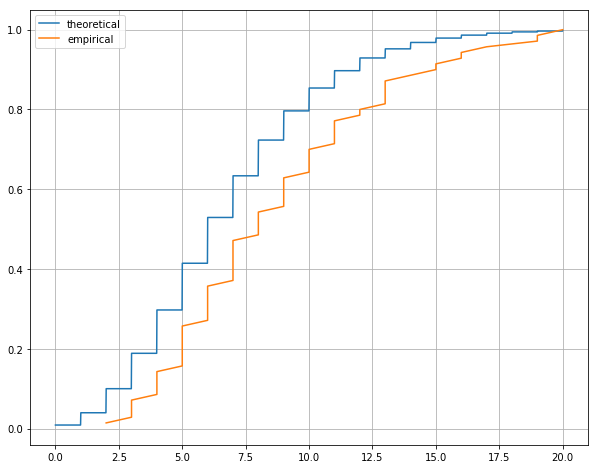

In [83]:
def dist_func_2(x):
    return sts.nbinom.cdf(x, 7, 0.51)
        

#prepairing data

chi_2 = 0
for x in arr_2_re:
    tmp = x
    l = len(tmp)
    p = dist_func_2(tmp[-1]) - dist_func_2(tmp[0])
    if n*p < 0.00001:
        print(x)
    chi_2 += ((l-n*p)**2)/(n*p)
g1 = sts.chi2.ppf(0.025, n_batches-1)
g2 = sts.chi2.ppf(0.975, n_batches-1)

print(g1, chi_2, g2)

X = np.linspace(0, 20, 2000)
Y = dist_func_2(X)
Y_ep, w = emp_dist_func(X_ep)

f = plt.figure(figsize = (10, 8))
plt.plot(X, Y, label = 'theoretical')
plt.plot(X_ep, Y_ep, label = 'empirical')
plt.legend()
plt.grid()
plt.show

In [85]:
p = 0.51
r = 7

g_1 = sts.norm.ppf(0.025)
g_2 = sts.norm.ppf(0.975)

s = np.sqrt(n*(p**2)/(r*(1-p)))*(r*(1-p)/p - x_mean)
print(g_1, s, g_2)

-1.9599639845400545 -4.614989295482466 1.959963984540054


### 1b

In [80]:
arr_2 = data[1]
arr_2 = np.array(sorted(arr_2))
arr_2_re = arr_2.reshape((7, 10))

x_mean = arr_2.mean()
n = len(arr_2)
X_ep = arr_2
n_batches = len(arr_2_re)

print(x_mean, n)

8.728571428571428 70


In [81]:
arr_2_re

array([[ 2.,  3.,  3.,  3.,  3.,  4.,  4.,  4.,  4.,  4.],
       [ 5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  6.,  6.],
       [ 6.,  6.,  6.,  6.,  6.,  7.,  7.,  7.,  7.,  7.],
       [ 7.,  7.,  7.,  8.,  8.,  8.,  8.,  8.,  9.,  9.],
       [ 9.,  9.,  9.,  9., 10., 10., 10., 10., 10., 11.],
       [11., 11., 11., 11., 12., 12., 13., 13., 13., 13.],
       [13., 14., 15., 15., 16., 16., 17., 19., 19., 20.]])

1.237344245791203 28.200884753790845 14.44937533544792


<function matplotlib.pyplot.show(*args, **kw)>

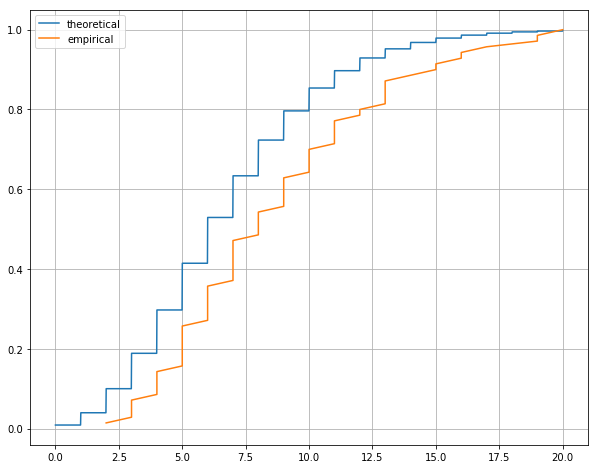

In [83]:
def dist_func_2(x):
    return sts.nbinom.cdf(x, 7, 0.51)
        

#prepairing data

chi_2 = 0
for x in arr_2_re:
    tmp = x
    l = len(tmp)
    p = dist_func_2(tmp[-1]) - dist_func_2(tmp[0])
    if n*p < 0.00001:
        print(x)
    chi_2 += ((l-n*p)**2)/(n*p)
g1 = sts.chi2.ppf(0.025, n_batches-1)
g2 = sts.chi2.ppf(0.975, n_batches-1)

print(g1, chi_2, g2)

X = np.linspace(0, 20, 2000)
Y = dist_func_2(X)
Y_ep, w = emp_dist_func(X_ep)

f = plt.figure(figsize = (10, 8))
plt.plot(X, Y, label = 'theoretical')
plt.plot(X_ep, Y_ep, label = 'empirical')
plt.legend()
plt.grid()
plt.show

In [85]:
p = 0.51
r = 7

g_1 = sts.norm.ppf(0.025)
g_2 = sts.norm.ppf(0.975)

s = np.sqrt(n*(p**2)/(r*(1-p)))*(r*(1-p)/p - x_mean)
print(g_1, s, g_2)

-1.9599639845400545 -4.614989295482466 1.959963984540054


### 2

In [16]:
#2

arr_4 = data[3]
arr_4 = np.array(sorted(arr_4))
x_mean = arr_4.mean()
X_ep = arr_4
n = len(arr_4)

print(x_mean, n)

0.7953535133895179 70


<function matplotlib.pyplot.show(*args, **kw)>

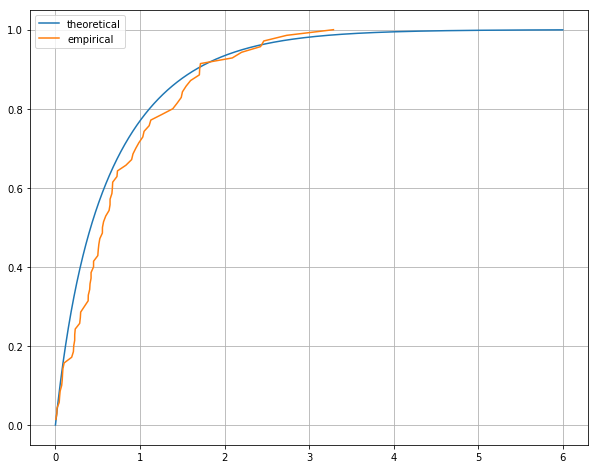

In [35]:
def dist_func_4(x):
    return 0.2*sts.expon.cdf(x, scale = 1/5) + 0.8*sts.expon.cdf(x, scale = 1/1.25)

def emp_dist_func(arr):
    res = []
    res_1 = []
    n = len(arr)
    for i in range(1,n+1):
        res.append(i/n)
        res_1.append((i-1)/n)
    return res, res_1

X = np.linspace(0, 6, 2000)
Y = dist_func_4(X)
Y_ep, w = emp_dist_func(X_ep)

f = plt.figure(figsize = (10, 8))
plt.plot(X, Y, label = 'theoretical')
plt.plot(X_ep, Y_ep, label = 'empirical')
plt.legend()
plt.grid()
plt.show

In [36]:
func = dist_func_4

def finding_sup(X_ep, emp_dist_func:callable, func:callable):
    res = 0
    x_ind = 0 
    n = len(X_ep)
    Y_ep, Y_ep_1 = emp_dist_func(X_ep)
    for i in range(n):
        m = np.sqrt(n)*abs(Y_ep[i] - func(X_ep[i]))
        m_1 = np.sqrt(n)*abs(Y_ep_1[i] - func(X_ep[i]))
        if m > res:
            res = m
            x_ind = X_ep[i]
        if m_1 > res:
            res = m_1
            x_ind = X_ep[i]
    print(x_ind)
    return res

# KOLMOGOROV
t = finding_sup(X_ep, emp_dist_func, func)
t

0.38693582935441


1.4883552425864475

In [37]:
lam = 0.2*1/5 + 0.8/1.25
std = np.sqrt(0.2*(1/5**2) + 0.8/(1.25**2))
g_1 = sts.norm.ppf(0.025)
g_2 = sts.norm.ppf(0.975)

s = np.sqrt(n)*(lam - x_mean)/std
print(g_1, s, g_2)

-1.9599639845400545 -1.3383761067279922 1.959963984540054
